In [1]:
# import
import os
import numpy as np
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [2]:
# avoid info and warnings of tf
os.environ["TF_CPP_MIN_LOG_LEVEL"]="2"

In [3]:
# helper function1 plot dataset
def plot_data(pl,X,y):
    # plot points where y==0
    pl.plot(X[y==0,0],X[y==0,1],'ob',alpha=0.5)
    # plot points where y==1
    pl.plot(X[y==1,0],X[y==1,1],'xr',alpha=0.5)
    pl.legend(['0','1'])
    return pl

In [4]:
# helper function2 plot the decision boundary learnt
def plot_decision_boundary(model, X,y):
    amin, bmin=X.min(axis=0)-0.1
    amax, bmax=X.max(axis=0)+0.1
    hticks=np.linspace(amin, amax,101)
    vticks=np.linspace(bmin, bmax,101)
    aa, bb=np.meshgrid(hticks,vticks)
    ab=np.c_[aa.ravel(),bb.ravel()]
    c=model.predict(ab)
    z=c.reshape(aa.shape)
    plt.Figure(figsize=(12,8))
    plt.contourf(aa,bb,z,cmp='bwr',aplha=0.2)
    plot_data(plt,X,y)
    return plt

In [5]:
X,y=make_circles(n_samples=1000,factor=0.6,noise=0.1,random_state=42)

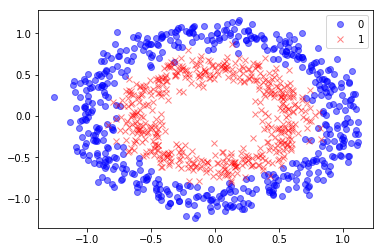

In [6]:
pl=plot_data(plt,X,y)
pl.show()

In [7]:
# lets split train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

C:\Users\bharti\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
# step 1 create simple sequential model
model=Sequential()

In [10]:
# step 2 add layers
#model.add(Dense(1,input_shape=(2,),activation="sigmoid"))


#add  2  hidden layers and 4 neurons at each layer 
model.add(Dense(4,input_shape=(2,),activation="tanh", name="hidden1"))
model.add(Dense(4,activation="tanh", name="hidden2"))
# output layer
model.add(Dense(1,activation="sigmoid", name="output_layer"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 4)                 12        
_________________________________________________________________
hidden2 (Dense)              (None, 4)                 20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [12]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [13]:
# step 3 compile model
model.compile(Adam(lr=0.05),'binary_crossentropy',metrics=['accuracy'])
from keras.utils import plot_model
plot_model(model,to_file="model.png", show_shapes=True, show_layer_names=True )

In [25]:
#lets define a call back
from keras.callbacks import EarlyStopping

#mycallback=[EarlyStopping(monitor='acc',patience=5,mode=max)]
mycallback=[EarlyStopping(monitor='val_acc',patience=5,mode=max)]

C:\Users\bharti\Anaconda3\lib\site-packages\keras\callbacks.py:502: RuntimeWarning: EarlyStopping mode <built-in function max> is unknown, fallback to auto mode.
  RuntimeWarning)


In [26]:
# step 4 train model - fit
#model.fit(X_train,y_train,epochs=100,verbose=1, callbacks=mycallback)
model.fit(X_train,y_train,epochs=100,verbose=1, callbacks=mycallback, validation_data=(X_test,y_test))

Train on 700 samples, validate on 300 samples
Epoch 1/100
700/700 [==============================] - 0s 47us/step - loss: 0.0587 - acc: 0.9700 - val_loss: 0.1196 - val_acc: 0.9533
Epoch 2/100
700/700 [==============================] - 0s 54us/step - loss: 0.0653 - acc: 0.9757 - val_loss: 0.1487 - val_acc: 0.9467
Epoch 3/100
700/700 [==============================] - 0s 59us/step - loss: 0.0820 - acc: 0.9743 - val_loss: 0.1468 - val_acc: 0.9433
Epoch 4/100
700/700 [==============================] - 0s 57us/step - loss: 0.0869 - acc: 0.9686 - val_loss: 0.1585 - val_acc: 0.9433
Epoch 5/100
700/700 [==============================] - 0s 51us/step - loss: 0.0663 - acc: 0.9729 - val_loss: 0.1152 - val_acc: 0.9500
Epoch 6/100
700/700 [==============================] - 0s 53us/step - loss: 0.0565 - acc: 0.9771 - val_loss: 0.1615 - val_acc: 0.9400


In [27]:
# step 5 evaluate model, run on test
eval_result=model.evaluate(X_test,y_test)

300/300 [==============================] - 0s 30us/step


In [28]:
print("test loss: ",eval_result[0],"  test accuracy : ",eval_result[1])

test loss:  0.16145198712746303   test accuracy :  0.9400000007947286


C:\Users\bharti\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'cmp', 'aplha'
  s)


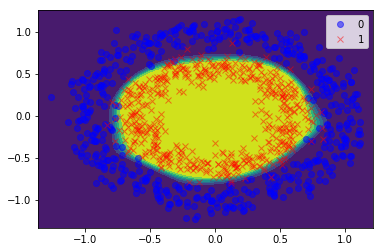

In [23]:
# plot decision boundary of model we learnt
plot_decision_boundary(model,X,y).show()